# Torque simulations

\begin{equation}
    \tau = m \times B = \mu_0 m \times (H_{app}+H_{demag})
\end{equation}

### Importing Packages

In [9]:
>>> import discretisedfield as df
>>> import micromagneticmodel as mm
>>> import mag2exp
>>> mesh = df.Mesh(p1=(-25e-9, -25e-9, -2e-9),
...                p2=(25e-9, 25e-9, 50e-9),
...                cell=(1e-9, 1e-9, 2e-9))
>>> def v_fun(point):
...     x, y, z = point
...     if x < -2e-9:
...         return (0, 0, 1)
...     elif x < 2e-9:
...         return (0, 1, 0)
...     else:
...         return (-1, 1, 0)
>>> field= df.Field(mesh, dim=3, value=v_fun, norm=1e6)
>>> mag2exp.magnetometry.magnetisation(field)

(-325269.1193457324, 405269.11934569944, 460000.0000001728)

In [ ]:
import mag2exp

In [1]:
import oommfc as oc
import discretisedfield as df
import micromagneticmodel as mm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

In [2]:
Ms = 10.3*9.274e-24/(5e-10*5e-10*4e-10)
K1 = -1.58e6
K2 = 1.18e6
K = 1.18e6
H_mag = 0.5/(4*np.pi*1e-7)

In [3]:
Ms

955222.0

In [4]:
region = df.Region(p1=(0, 0, 0), p2=(100e-9, 100e-9, 100e-9))
mesh = df.Mesh(region=region, cell=(5e-9, 5e-9, 5e-9))

system = mm.System(name='Box2')

system.energy = (mm.Exchange(A=8.78e-13)
                 + mm.UniaxialAnisotropy(K1=K1, K2=K2, u=(0, 0, 1))
                 #+ mm.CubicAnisotropy(K=K, u1=(0, 0, 1), u2=(0, 1, 0))
                 + mm.Demag()
                 + mm.Zeeman(H=(0, 0, H_mag)))

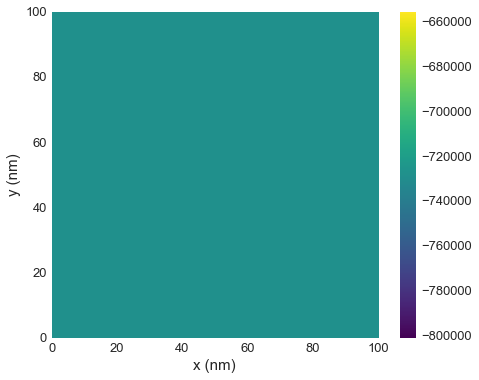

In [5]:
system.m = df.Field(mesh, dim=3, value=np.random.rand(3)-1, norm=Ms)
system.m.z.plane('z').mpl.plot()

In [6]:
# minimize the energy
md = oc.MinDriver()
md.drive(system)

Running OOMMF (DockerOOMMFRunner) [2021/07/27 20:46]... (5.3 s)


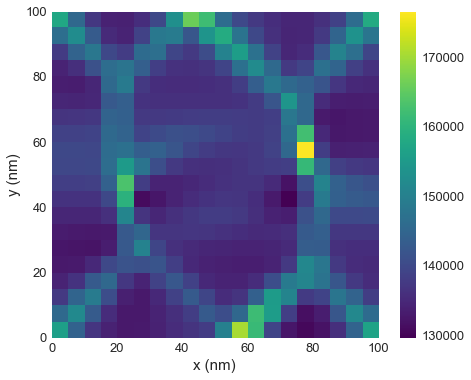

In [7]:
system.m.z.plane('z').mpl.plot()

\begin{align}
    {\bf M} &= \frac{d{\bf m}}{dV}, \\
    {\bf m} &= \int {\bf M} dV,\\
    {\bf m} &=  {\bf M} V,
\end{align}

where ${\bf M}$ is magnetisation field, ${\bf m}$ is the magnetic moment, and $V$ is the volume.

\begin{align}
    {\bf \tau} &= {\bf m} \times {\bf B}, \\
    &= \mu_0 {\bf m} \times \left({\bf H} + {\bf M} \right), \\
    &= \mu_0 {\bf m} \times {\bf H}, \\
    &= \mu_0 {\bf m} \times \left( {\bf H}_{app} + {\bf H}_{demag} \right),
\end{align}
where ${\bf \tau}$ is the torque, ${\bf B}$ is the magnetic flux density,  ${\bf H}$ is the total magnetic field, ${\bf H}_{app}$ is the applied magnetic field, and ${\bf H}_{demag}$ is the demagnetisation field.

In [8]:
def torque_2(system):
    total_field = 4*np.pi*1e-7*(oc.compute(system.energy.demag.effective_field, system) + system.energy.zeeman.H)
    #total_field = 4*np.pi*1e-7*df.Field(mesh=system.m.mesh, dim=3, value=system.energy.zeeman.H)
    norm_field = df.Field(system.m.mesh, dim=1, value=(system.m.norm.array != 0))
    volume = df.integral(norm_field * df.dV, direction='xyz')
    moment = system.m * volume #system.m.mesh.dV
    torque = (moment & total_field)
    
    norm_field = df.Field(system.m.mesh, dim=1, value=(system.m.norm.array != 0))
    volume = df.integral(norm_field * df.dV, direction='xyz')
    
    return (df.integral(torque * df.dV / volume**2 , direction='xyz'))

In [9]:
angles = np.linspace(0, 4*np.pi, 150)

torque_val_x = np.full_like(angles, np.nan)
torque_val_y = np.full_like(angles, np.nan)
torque_val_z = np.full_like(angles, np.nan)

In [10]:
for i, angle in enumerate(angles):
    system.energy.zeeman.H= (0,H_mag*np.sin(angle),H_mag*np.cos(angle))
    md.drive(system)
    torque_val_x[i], torque_val_y[i], torque_val_z[i] = torque_2(system)

Running OOMMF (DockerOOMMFRunner) [2021/07/27 20:46]... (1.9 s)
Running OOMMF (DockerOOMMFRunner) [2021/07/27 20:46]... (2.0 s)
Running OOMMF (DockerOOMMFRunner) [2021/07/27 20:46]... (4.9 s)
Running OOMMF (DockerOOMMFRunner) [2021/07/27 20:46]... (2.0 s)
Running OOMMF (DockerOOMMFRunner) [2021/07/27 20:46]... (5.2 s)
Running OOMMF (DockerOOMMFRunner) [2021/07/27 20:46]... (2.0 s)
Running OOMMF (DockerOOMMFRunner) [2021/07/27 20:47]... (5.8 s)
Running OOMMF (DockerOOMMFRunner) [2021/07/27 20:47]... (2.0 s)
Running OOMMF (DockerOOMMFRunner) [2021/07/27 20:47]... (4.7 s)
Running OOMMF (DockerOOMMFRunner) [2021/07/27 20:47]... (1.9 s)
Running OOMMF (DockerOOMMFRunner) [2021/07/27 20:47]... (5.2 s)
Running OOMMF (DockerOOMMFRunner) [2021/07/27 20:47]... (1.9 s)
Running OOMMF (DockerOOMMFRunner) [2021/07/27 20:47]... (8.1 s)
Running OOMMF (DockerOOMMFRunner) [2021/07/27 20:47]... (1.9 s)
Running OOMMF (DockerOOMMFRunner) [2021/07/27 20:47]... (4.0 s)
Running OOMMF (DockerOOMMFRunner) [2021/

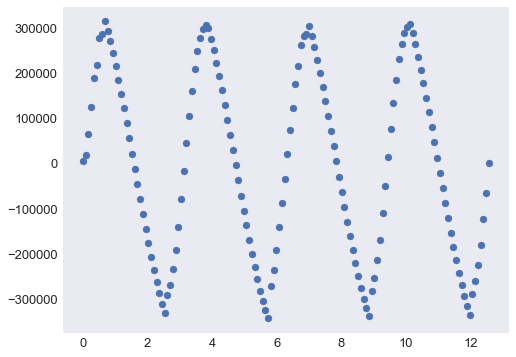

In [11]:
plt.scatter(angles, torque_val_x)

In [12]:
region = df.Region(p1=(0, 0, 0), p2=(100e-9, 100e-9, 100e-9))
mesh = df.Mesh(region=region, cell=(5e-9, 5e-9, 5e-9))

system = mm.System(name='Box2')

system.energy = (mm.Exchange(A=8.78e-13)
                 #+ mm.UniaxialAnisotropy(K1=K1, K2=K2, u=(0, 0, 1))
                 + mm.CubicAnisotropy(K=K, u1=(0, 0, 1), u2=(0, 1, 0))
                 + mm.Demag()
                 + mm.Zeeman(H=(0, 0, H_mag)))

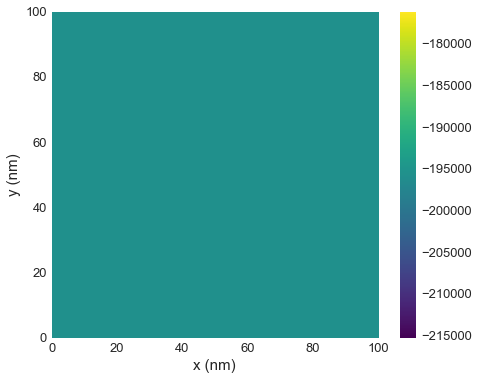

In [13]:
system.m = df.Field(mesh, dim=3, value=np.random.rand(3)-1, norm=Ms)
system.m.z.plane('z').mpl.plot()

Running OOMMF (DockerOOMMFRunner) [2021/07/27 21:03]... (6.4 s)


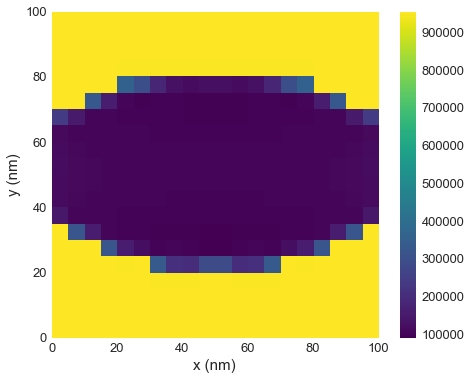

In [14]:
# minimize the energy
md = oc.MinDriver()
md.drive(system)
system.m.z.plane('z').mpl.plot()

In [15]:
angles_2 = np.linspace(0, 4*np.pi, 150)

torque_val_x_2 = np.full_like(angles, np.nan)
torque_val_y_2 = np.full_like(angles, np.nan)
torque_val_z_2 = np.full_like(angles, np.nan)

for i, angle in enumerate(angles_2):
        system.energy.zeeman.H= (0,H_mag*np.sin(angle),H_mag*np.cos(angle))
        md.drive(system)
        torque_val_x_2[i], torque_val_y_2[i], torque_val_z_2[i] = torque_2(system)

Running OOMMF (DockerOOMMFRunner) [2021/07/27 21:04]... (2.0 s)
Running OOMMF (DockerOOMMFRunner) [2021/07/27 21:04]... (2.0 s)
Running OOMMF (DockerOOMMFRunner) [2021/07/27 21:04]... (3.0 s)
Running OOMMF (DockerOOMMFRunner) [2021/07/27 21:04]... (1.9 s)
Running OOMMF (DockerOOMMFRunner) [2021/07/27 21:04]... (3.8 s)
Running OOMMF (DockerOOMMFRunner) [2021/07/27 21:04]... (2.0 s)
Running OOMMF (DockerOOMMFRunner) [2021/07/27 21:04]... (2.6 s)
Running OOMMF (DockerOOMMFRunner) [2021/07/27 21:04]... (2.1 s)
Running OOMMF (DockerOOMMFRunner) [2021/07/27 21:04]... (2.4 s)
Running OOMMF (DockerOOMMFRunner) [2021/07/27 21:04]... (1.9 s)
Running OOMMF (DockerOOMMFRunner) [2021/07/27 21:04]... (3.1 s)
Running OOMMF (DockerOOMMFRunner) [2021/07/27 21:04]... (1.9 s)
Running OOMMF (DockerOOMMFRunner) [2021/07/27 21:04]... (2.1 s)
Running OOMMF (DockerOOMMFRunner) [2021/07/27 21:04]... (1.9 s)
Running OOMMF (DockerOOMMFRunner) [2021/07/27 21:04]... (2.1 s)
Running OOMMF (DockerOOMMFRunner) [2021/

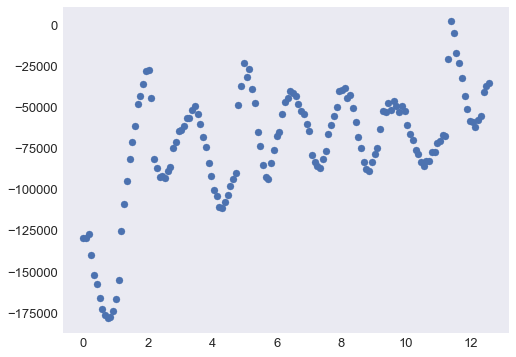

In [16]:
plt.scatter(angles_2, torque_val_x_2)

Increase applied field -> less sheered sin wave
Add general rotation about an axis
Fit curves and check against initial K values

In [ ]:
region = df.Region(p1=(0, 0, 0), p2=(50e-9, 50e-9, 50e-9))
mesh = df.Mesh(region=region, cell=(5e-9, 5e-9, 5e-9))

system = mm.System(name='Box2')

system.energy = (mm.Exchange(A=8.78e-12)
               + mm.CubicAnisotropy(K=K, u1=(0, 0, 1), u2=(0, 1, 0))
               + mm.Demag()
               + mm.Zeeman(H=(0, 0, 397887)))
Ms = 384e3

def ms_fun(pos):
    x, y, z = pos
    if z > 25e-9:
        return Ms
    else:
        return 0

In [ ]:
system.m = df.Field(mesh, dim=3, value=(0,0,1), norm=ms_fun)
system.m.z.plane('z').mpl.plot()

In [ ]:
def magentisation_parallel(field):
    return df.integral(field.z * df.dV, direction='xyz')

def magentisation_perpendicular(field):
    return (df.integral(field.x * df.dV, direction='xyz'),
           df.integral(field.y * df.dV, direction='xyz'))

def magnetisation(field):
    norm_field = df.Field(field.mesh, dim=1, value=(field.norm.array != 0))
    volume = df.integral(norm_field * df.dV, direction='xyz') 
    return (df.integral(field * df.dV / volume , direction='xyz'))

In [ ]:

mp = df.integral(system.m.norm * df.dV / volume, direction='xyz') / Ms

In [ ]:
new_field = df.Field(mesh, dim=1, value=(system.m.norm.array != 0))

In [ ]:
df.integral(new_field * df.dV, direction='xyz') 

In [ ]:
magnetisation(system.m)

### Magnetisation data

Perform micromagnetic simulation or load from file.

In [ ]:
system.m.k3d

def torque(system):
    total_field = oc.compute(system.energy.demag.effective_field, system) + system.energy.zeeman.H
    torque = 4*np.pi*1e-7*(system.m & total_field)
    return (torque.x.array.sum(),torque.y.array.sum(),torque.z.array.sum()) # Some sort of normalisation

angle = np.pi/3
system.energy.zeeman.H = (0,H_mag*np.sin(angle),H_mag*np.cos(angle))
md.drive(system)

torque_2(system)

In [ ]:
H_mag = 5e6
print(4*np.pi*1e-7*H_mag)

print(0.5/(4*np.pi*1e-7))

In [ ]:
from scipy.optimize import curve_fit
def fun(angle, a,b,c,d):
    return a*np.sin(4*angle) + b*np.sin(8*angle) + c*np.sin(16*angle) + d*np.sin(32*angle)

In [ ]:
popt, pcov = curve_fit(fun, angles, torque_val_x, p0=[-1e15, 1e14, 1e14, -1e14])

In [ ]:
popt

In [ ]:
plt.plot(angles, torque_val_x - fun(angles,popt[0],popt[1], popt[2], popt[3]))

In [ ]:
region = df.Region(p1=(0, 0, 0), p2=(100e-9, 100e-9, 100e-9))
mesh = df.Mesh(region=region, cell=(5e-9, 5e-9, 5e-9))

system = mm.System(name='Box2')

system.energy = (mm.Exchange(A=8.78e-12)
               + mm.UniaxialAnisotropy(K=0.8e6, u=(0, 0, 1))
               + mm.Demag()
               + mm.Zeeman(H=(0, 0, 10e4)))
Ms = 384e3
system.m = df.Field(mesh, dim=3, value=(0,0,1), norm=Ms)
#system.m.z.plane('z').mpl.plot()
system.m = df.Field(mesh, dim=3, value=(0,0,1), norm=Ms)
system.m.z.plane('z').mpl.plot()

In [ ]:
md = oc.MinDriver()
md.drive(system)

In [ ]:
system.m.plane('z').mpl.plot()

In [ ]:
angles = np.linspace(0, 2*np.pi, 70)
H_mag = 10e6



torque_val_x = np.zeros_like(angles)
torque_val_y = np.zeros_like(angles)
torque_val_z = np.zeros_like(angles)

for i, angle in enumerate(angles):
        system.energy.zeeman.H= (0,H_mag*np.sin(angle),H_mag*np.cos(angle))
        md.drive(system)
        torque_val_x[i], torque_val_y[i], torque_val_z[i] = torque(system)

In [ ]:
plt.scatter(angles, torque_val_x)